<a href="https://colab.research.google.com/github/vennela28/MLnow_2.0/blob/main/GettingPlaced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Author***: Vennela Sunnam

***Date***: July 25, 2021

***Task***: KNN 

***Reach me*** @ [Gmail](vennela.jobs@gmail.com)


In [1]:
import numpy as np                                                 # Implements multi-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling                                            # For simple Exploratory data analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

Mounting the Drive to analyze the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/GotPlaced'

/content/drive/MyDrive/GotPlaced


***Agenda***

Predict whether a student got placed or not using KNN.

# Data Loading

1. Importing the dataset

In [35]:
placement = pd.read_csv('Placement_Data_Full_Class.csv')
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Profiling

1. Understanding the dataset

In [36]:
placement.shape

(215, 15)

In [37]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [38]:
placement['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

**Observations:**

- The above 3 functions indicate that there are non-empty salary values for the folks who are placed and there are empty values for the folks who are not placed. 

- Here we need to fill the salary to 0 rather than dropping these rows of data.

In [39]:
placement.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the Placements')

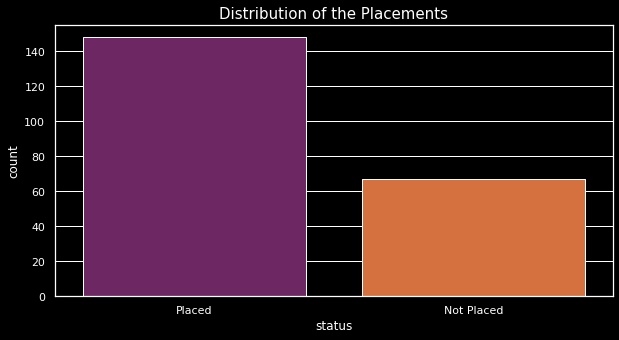

In [40]:
plt.style.use('dark_background') 
plt.figure(figsize=(10,5))
sns.countplot('status',data = placement,palette = 'inferno')
plt.title("Distribution of the Placements",fontsize = 15)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

In [42]:
placed = placement.copy()

In [43]:
placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We won't use all of the features in the dataset. We will use the 'ssc_p','hsc_p','degree_p','workex','mba_p','etest_p','gender','degree_t' and 'specialisation' columns to predict whether a candidate will be placed or not.

In [44]:
placed['status'] = placed['status'].map({'Placed':1,'Not Placed':0})
placed['workex'] = placed['workex'].map({'Yes':1,'No':0})
placed['gender'] = placed['gender'].map({'M':1,'F':0})
placed['hsc_b'] = placed['hsc_b'].map({'Central':1,'Others':0})
placed['ssc_b'] = placed['ssc_b'].map({'Central':1,'Others':0})
placed['degree_t'] = placed['degree_t'].map({'Sci&Tech':0,'Comm&Mgmt':1,'Others':2})
placed['specialisation'] = placed['specialisation'].map({'Mkt&HR':1,'Mkt&Fin':0})
placed['hsc_s'] = placed['hsc_s'].map({'Commerce':0,'Science':1,'Arts':2})

In [45]:
X = placed[['ssc_p','hsc_p','degree_p','workex','mba_p','etest_p','gender','degree_t','specialisation']]
Y = placed['status']

In [46]:
placed.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,0,91.00,0,0,58.00,0,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,1,78.33,0,1,77.48,0,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,1,68.00,1,2,64.00,1,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,1,52.00,1,1,52.00,0,0,66.0,1,59.43,0,NaN
4,5,1,85.80,1,73.60,1,0,73.30,1,0,96.8,0,55.50,1,425000.0


Now that we have our features, we will split them and into training and testing sets and we will also scale down our features in order to have better results.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
prediction = knn.predict(X_test)

In [51]:
print("Accuracy:",accuracy_score(Y_test, prediction)*100)
print("Precision:",precision_score(Y_test, prediction)*100)
print("Recall:",recall_score(Y_test, prediction)*100)

Accuracy: 74.4186046511628
Precision: 80.76923076923077
Recall: 77.77777777777779


In [53]:
user_input = [[47.00, 95.00, 50.00,0, 52.80, 45.00, 0, 0, 1]]
user_pred = knn.predict(user_input)
if user_pred == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate isn't Placed.")

The Candidate will be Placed!


In [54]:
error = []
for i in  range(1,100):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error')

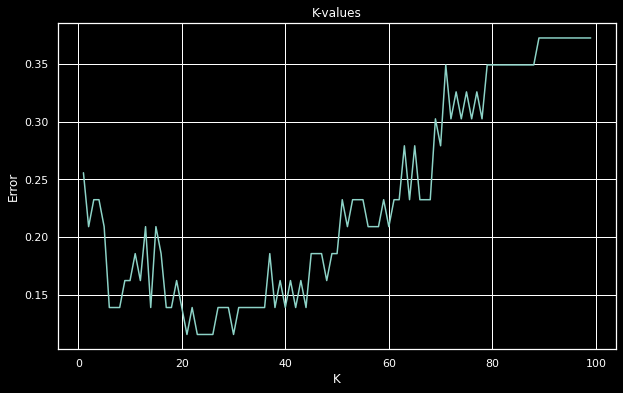

In [55]:
plt.figure(figsize = (10,6))
plt.plot(range(1,100),error)
plt.title('K-values')
plt.xlabel('K')
plt.ylabel('Error')

In [56]:
knn1 = KNeighborsClassifier(n_neighbors = 20)
knn1.fit(X_train, Y_train)
prediction1 = knn1.predict(X_test)

In [57]:
print("Accuracy:",accuracy_score(Y_test, prediction1)*100)
print("Precision:",precision_score(Y_test, prediction1)*100)
print("Recall:",recall_score(Y_test, prediction1)*100)

Accuracy: 86.04651162790698
Precision: 83.87096774193549
Recall: 96.29629629629629


In [59]:
user_input2 = [[60.00, 90.00, 55.00, 0, 58.00, 51.00, 1, 0, 1]]
user_pred2 = knn1.predict(user_input2)
if user_pred2 == 1:
    print("The Candidate will be Placed!")
else:
    print("The Candidate wouldn't be placed.")

The Candidate will be Placed!
